# Titanic Passenger Data 

This classic dataset about the information on passengers aboard the [RMS Titanic](https://en.wikipedia.org/wiki/RMS_Titanic) which was travelling from Southampton to New York City in the year 1912. The dataset contains information on the passenger details like age, sex, cabin class, ticket fare and whether the passenger survived or not.  

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let us check the total number of data points available in the data set.

In [56]:
titanic_data = pd.read_csv('titanic_data.csv')

In [57]:
print "Total data points: {}".format(len(titanic_data))

# print some sample data points
titanic_data.head()

Total data points: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Before marching ahead, we will first check whether there are any missing values or cleaning that needs to be done.

In [58]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since we have so many missing values in the **Cabin** column, we will drop the column. Analysing the tickets also, would not be of much practical use either, so we will drop the columns.

In [59]:
titanic_data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

We have removed the **Cabin** and **Ticket** axis but still we have so many NaN in the **Age** column. We will go ahead and remove those rows, which contain NaN values for age.

In [60]:
titanic_data = titanic_data[pd.notnull(titanic_data['Age'])]

Let's have a look at the data remaining and analyze if any more cleaning needs to be done. Ofcourse we would return to more cleaning if we encounter problems during the explrolation phase.  

In [61]:
print titanic_data.isnull().sum()
print '\n'
print 'Data points remaining after cleaning: {}'.format(len(titanic_data))

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64


Data points remaining after cleaning: 714


### Who all were travelling on the Titanic ? 

A demographics of the people travelling on the Titanic would give us a good idea. A histogram depicting the demographics can be plotted.

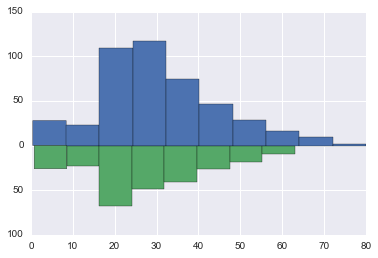

In [146]:
titanic_data_by_sex = titanic_data.groupby(['Sex'])

titanic_data_male = titanic_data_by_sex.get_group('male')
titanic_data_female = titanic_data_by_sex.get_group('female')

plt.hist(titanic_data_male['Age'], bins=10)
plt.hist(titanic_data_female['Age'], weights=[-1 for _ in range(len(titanic_data_female))], bins=8)
ax = plt.gca()

from matplotlib import ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: int(np.abs(x)))) 